# **PROBLEM STATEMENT**

Description: Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

Objective: Understand the Dataset & cleanup (if required). Build classification model to predict weather the loan borrower will default or not. Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/Loan_Default.csv")

# **FEATURES**

*   **ID** = Customer ID of Applicant
*   **year** = Year of Application

*   loan limit = maximum avaliable
amount of the loan allowed to be taken

*   Gender = sex type

*   approv_in_adv = Is loan preapproved or not

*   loan_type = Type of loan

*   loan_purpose = the reason you want to borrow
money
*    Credit_Worthiness = is how a lender determines that you will default on your debt
obligations, or how worthy you are to receive new credit


*    open_credit = is a pre-approved
loan between a lender and a borrower. It allows the borrower to make repeated withdrawals
up to a certain limit


*    business_or_commercial = Usage type of the loan amount


*    loan_amount
= The exact loan amount


*   rate_of_interest = is the amount a lender charges a borrower and
is a percentage of the principal—the amount loaned



*   Interest_rate_spread = the difference
between the interest rate a financial institution pays to depositors and the interest rate it
receives from loans

*   Upfront_charges = Fee paid to a lender by a borrower as consideration
for making a new loan

*   Neg_ammortization = refers to a
situation when a loan borrower makes a payment less than the standard installment set by
the bank

*    interest_only = amount of interest only without principle

*   lump_sum_payment = is
an amount of money that is paid in one single payment rather than in installments

*   property_value = the present worth of future benefits arising from the ownership of the
property
*   construction_type = Collateral construction type


*    occupancy_type = classifications
refer to categorizing structures based on their usage


*    Secured_by = Type of Collatoral



*   total_units = number of unites


*   income = refers to the amount of money, property, and other
transfers of value received over a set period of time


*  credit_type = type of credit


*    coapplicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan

*  age = applicant's age  


*   submission_of_application = Ensure the application is complete or not

*   LTV = life-time value
(LTV) is a prognostication of the net profit
*   Region = applicant's place


*   Security_Type = Type
of Collatoral

*   status = Loan status (Approved/Declined)
*   dtir1 = debt-to-income ratio








In [ ]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
#checking shape of the dataet
df.shape

(148670, 34)

In [ ]:
#All features names
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
df['Status'].value_counts()

,count
Status,
0,112031
1,36639




*   **Loan Defaulted:1** =36639
*   **Loan Approved:0** = 112031





In [ ]:
#checks duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


# **Data Characteristics And Visualization**

In [ ]:
import missingno as msno

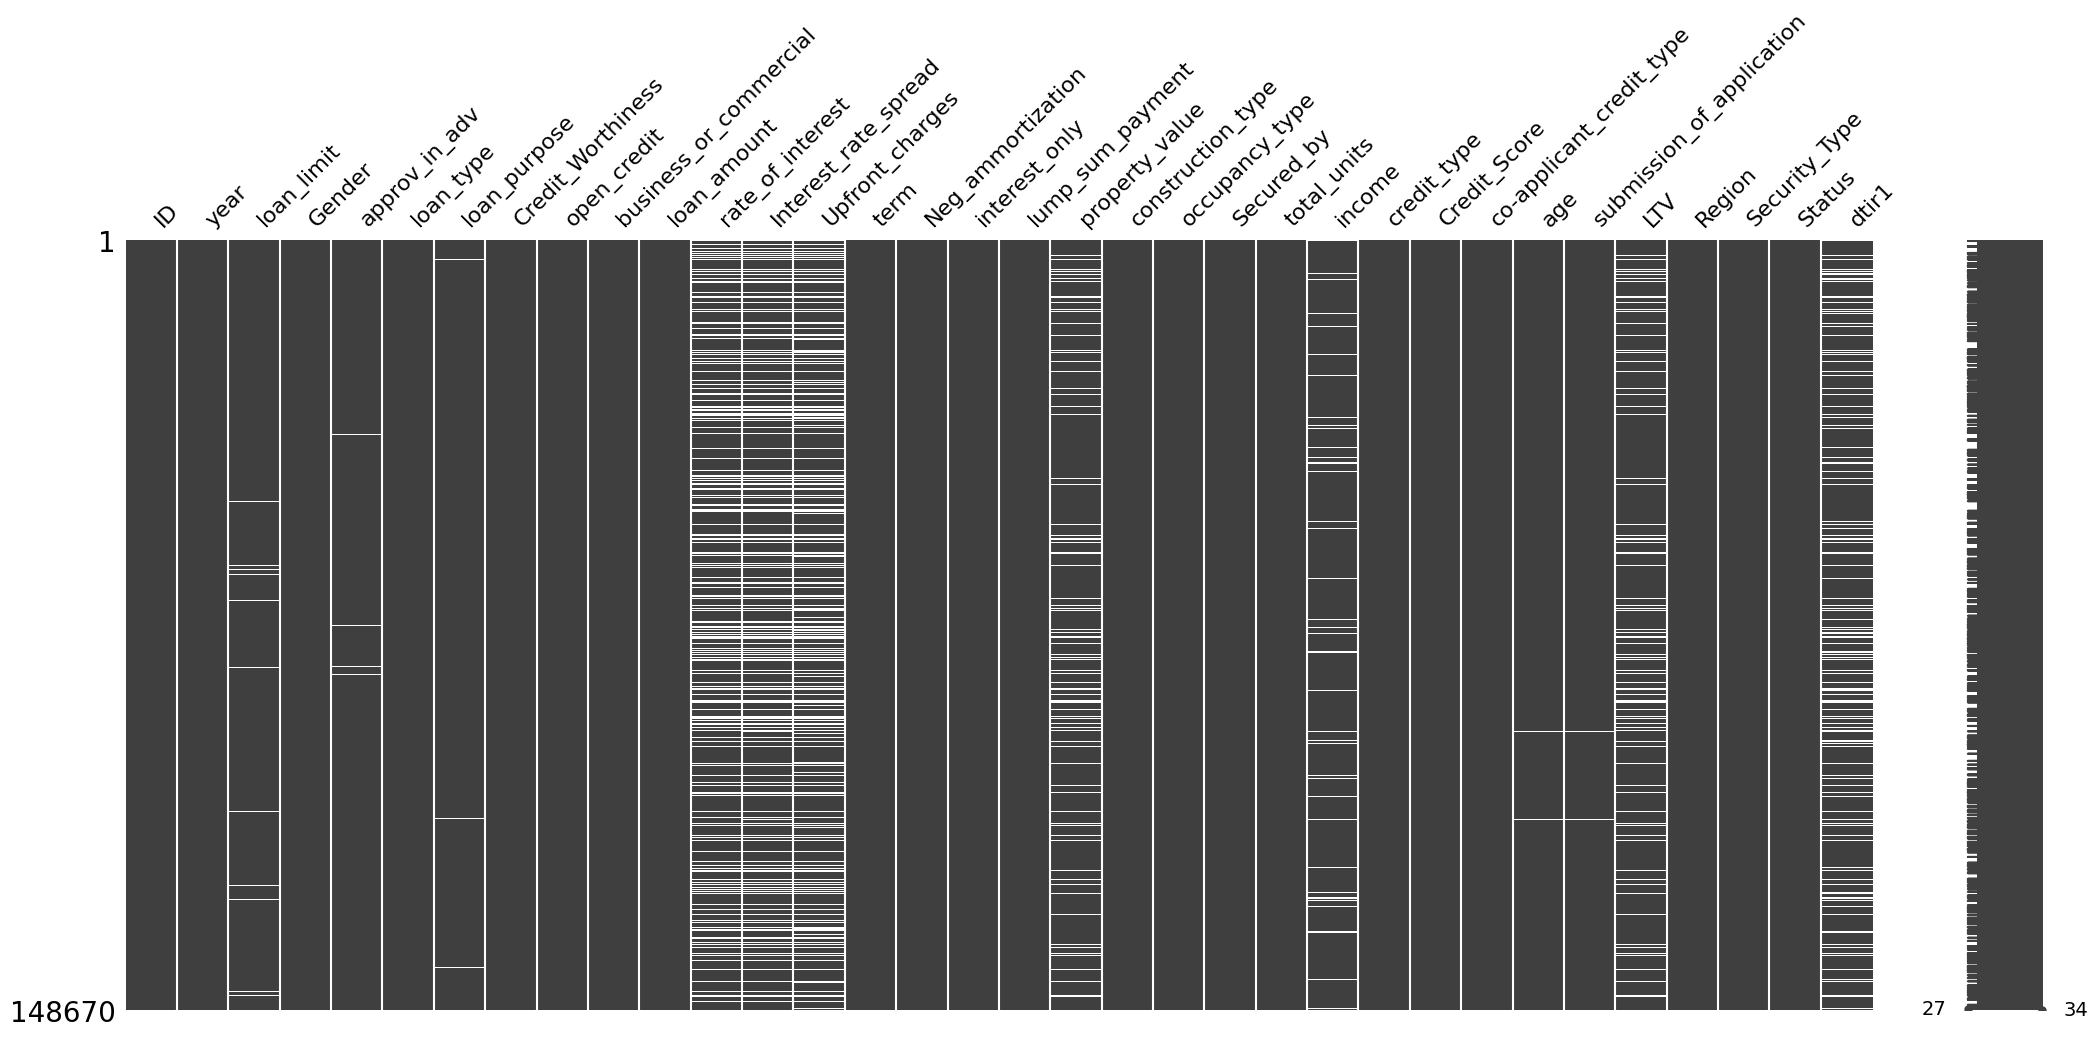

In [ ]:
#Null Values Distribution
msno.matrix(df=df)
plt.show()

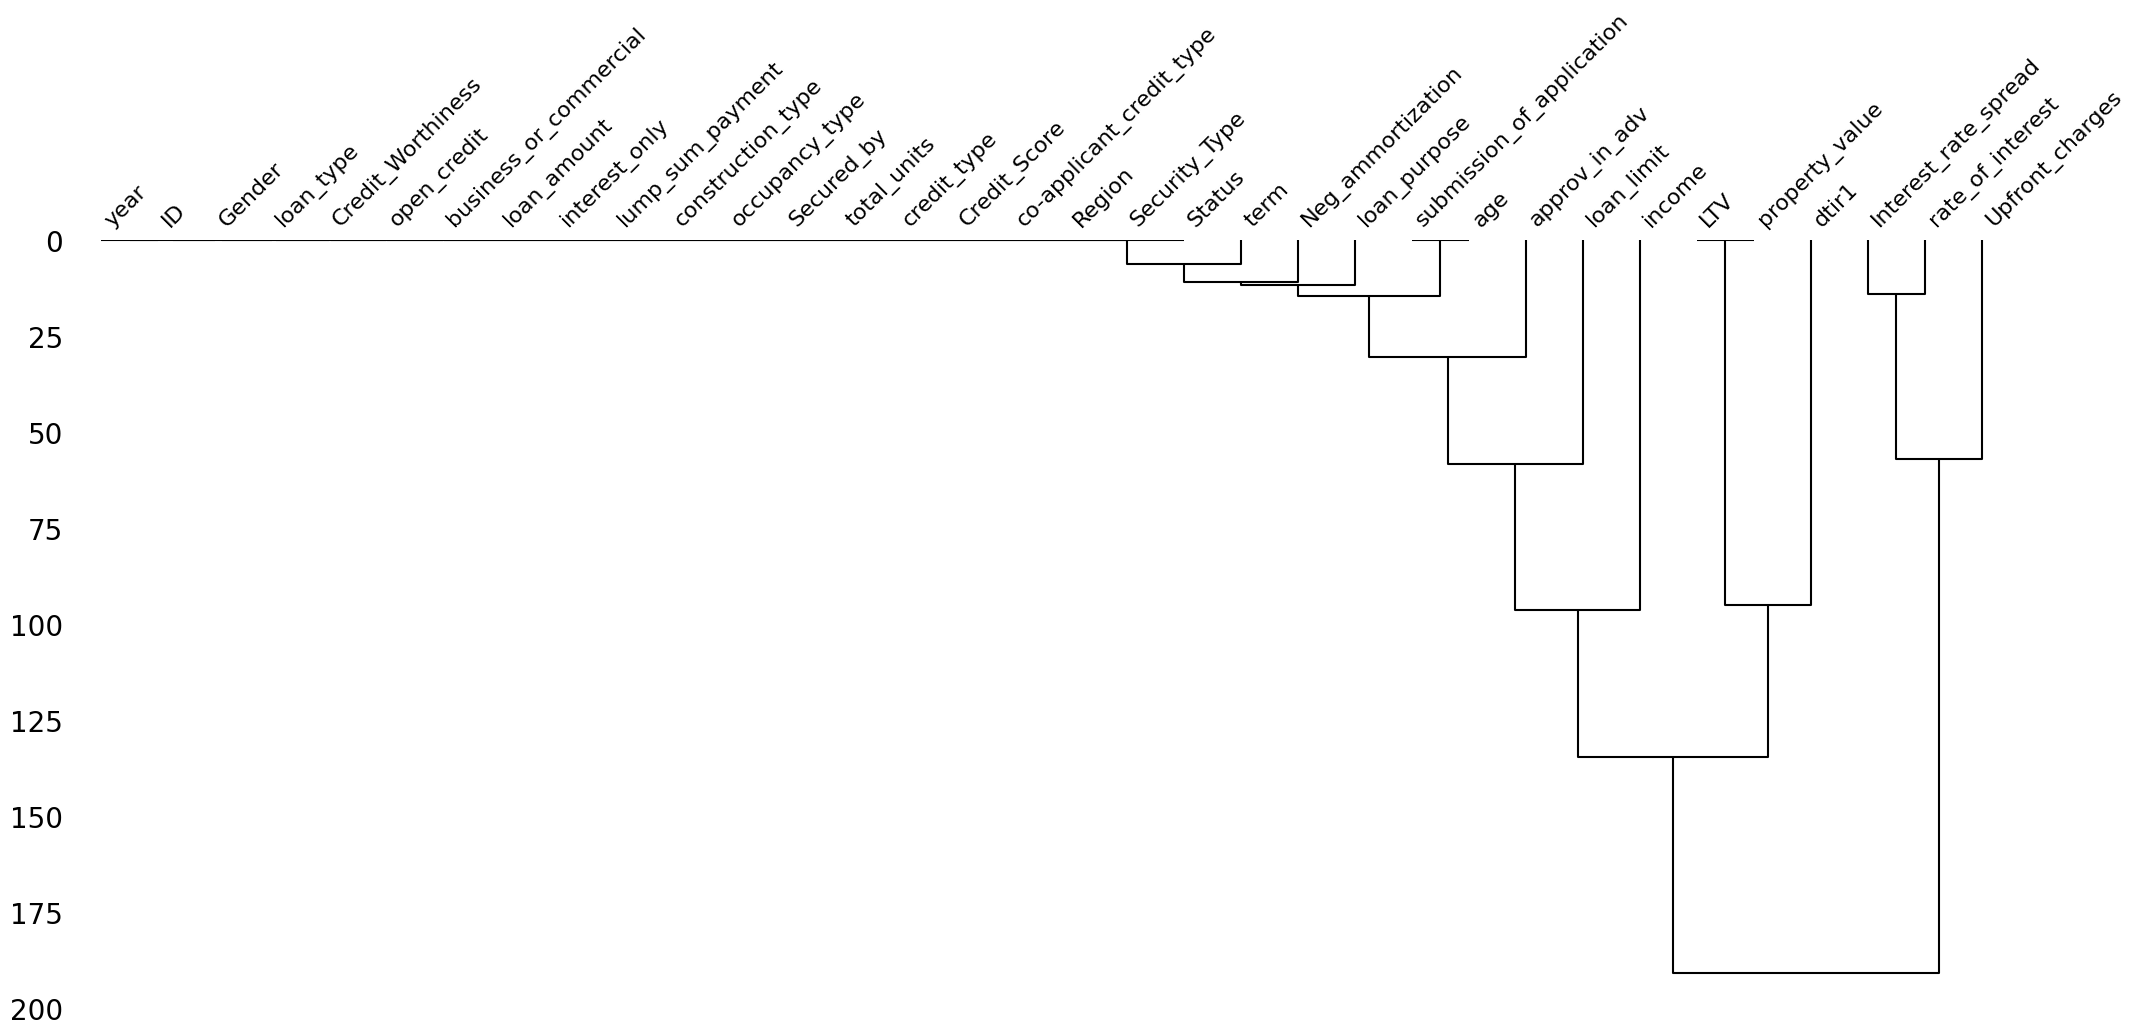

In [ ]:
msno.dendrogram(df)
plt.show()

## **Checking if the Loan defaulter is dependent on Gender**

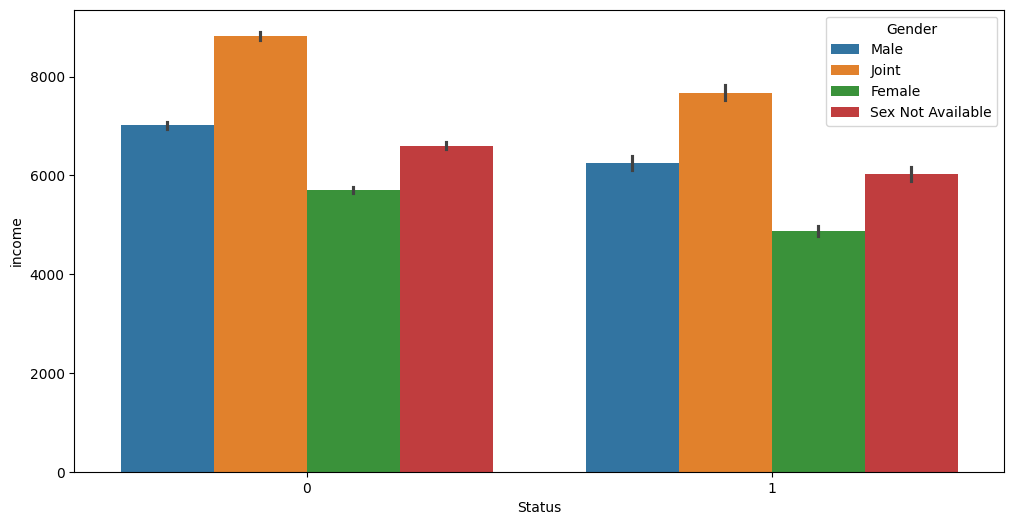

In [ ]:
fig,ax=plt.subplots()
sns.barplot(data=df,x="Status",y="income",hue="Gender")
fig.set_size_inches([12,6])
plt.show()

In [ ]:
df.Gender.value_counts()

,count
Gender,
Male,42346
Joint,41399
Sex Not Available,37659
Female,27266


## **How Loan Defaulter is related to Credit Score and Loan Amount**

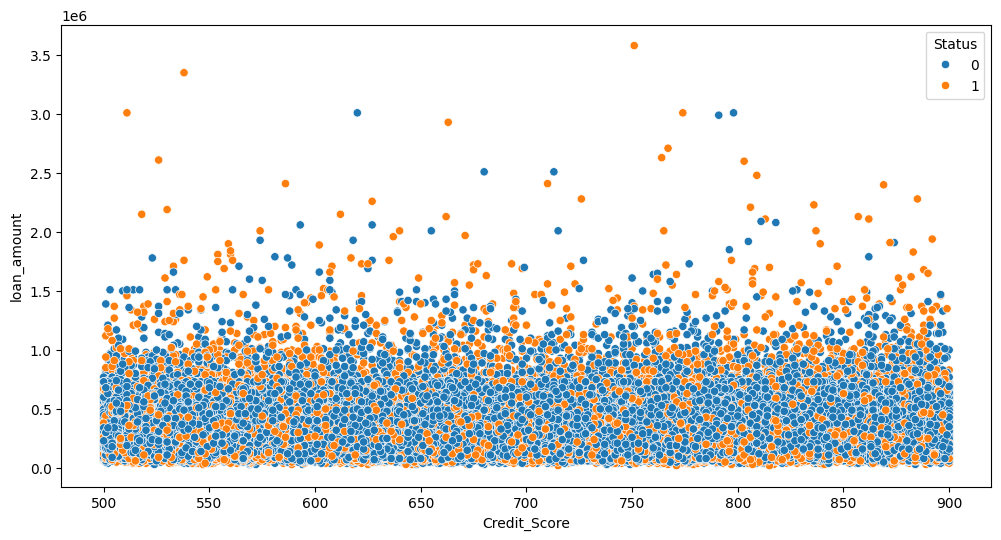

In [ ]:
fig,ax=plt.subplots()
sns.scatterplot(data=df,x="Credit_Score",y="loan_amount",hue="Status")
fig.set_size_inches([12,6])
plt.show()

## **Checking if the dataset is imbalanced or not**

### Using Pie Plot and Count Plot

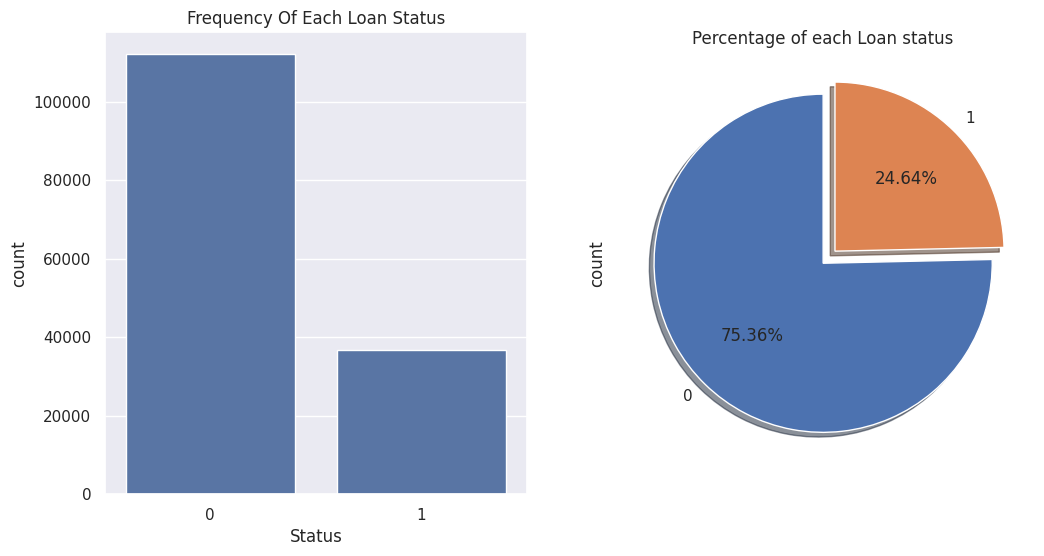

In [ ]:
sns.set_theme()
fig,axs = plt.subplots(1,2,figsize =(12,6))
sns.countplot(x="Status",data=df,ax=axs[0])
axs[0].set_title("Frequency Of Each Loan Status")
df.Status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

This clearly is a case of an imbalanced class problem where the value of one class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

Here, We have finalize loan status as our target variable which has now 24 % are defaulters for the loan payment.

<Axes: xlabel='loan_type', ylabel='count'>

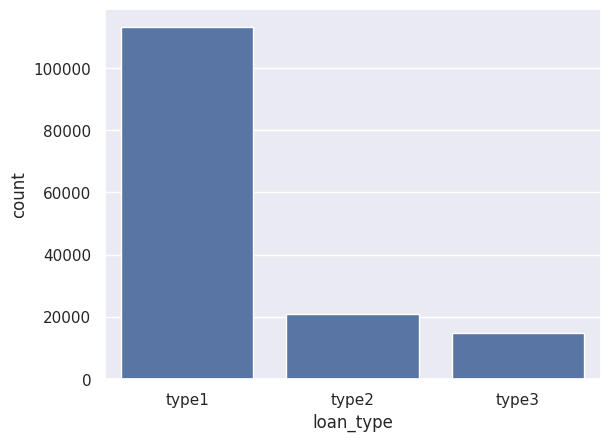

In [ ]:
sns.countplot(x="loan_type",data=df)

<Axes: xlabel='age', ylabel='count'>

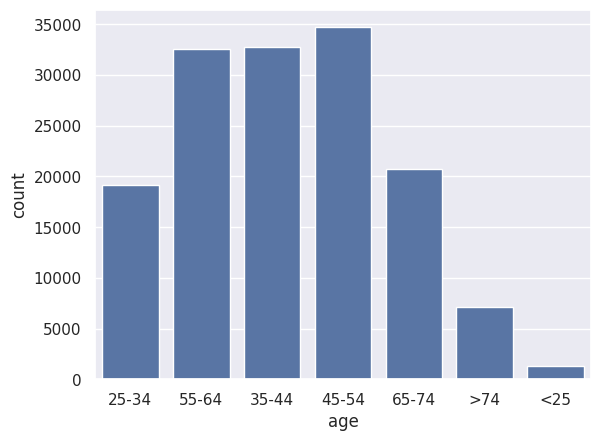

In [ ]:
sns.countplot(data=df,x="age")

<Axes: xlabel='rate_of_interest', ylabel='income'>

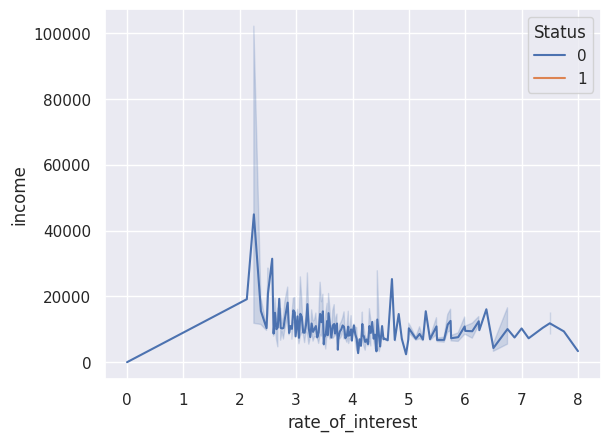

In [ ]:
sns.lineplot(data=df,x="rate_of_interest",y="income",hue="Status")

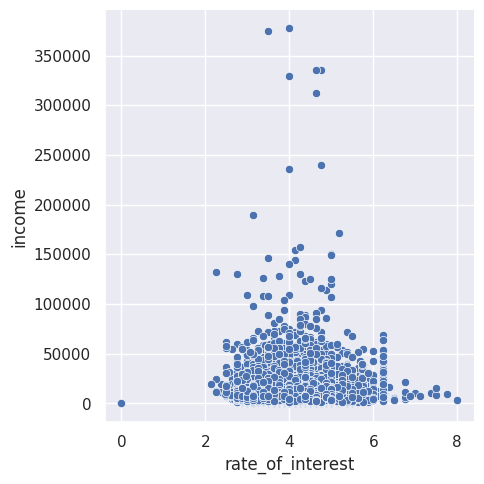

In [ ]:
sns.relplot(data=df,x= "rate_of_interest",y="income")

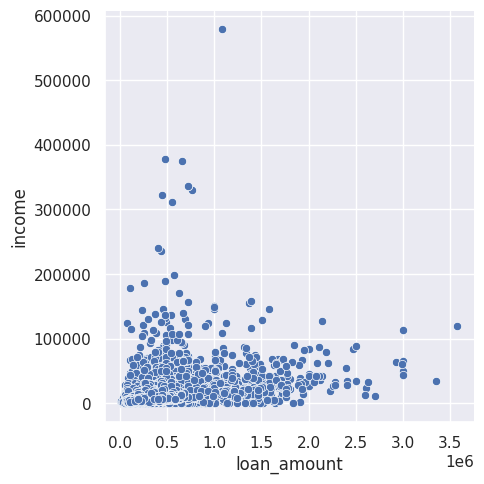

In [ ]:
sns.relplot(data=df,y="income",x="loan_amount")

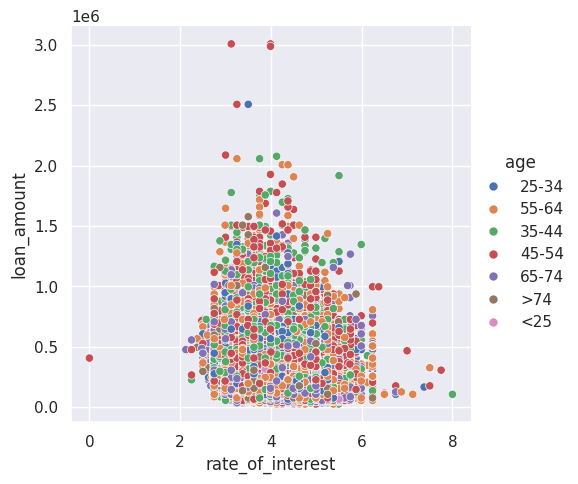

In [ ]:
sns.relplot(data=df,x="rate_of_interest",y="loan_amount",hue="age")

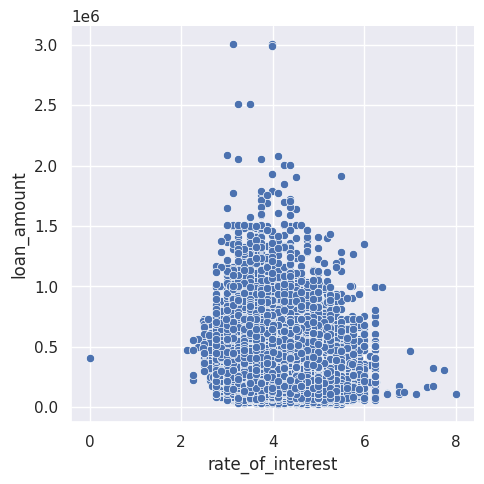

In [ ]:
sns.relplot(data=df,x="rate_of_interest",y="loan_amount")

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

/tmp/ipython-input-31-3232963459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loan_amount)


<Axes: xlabel='loan_amount', ylabel='Density'>

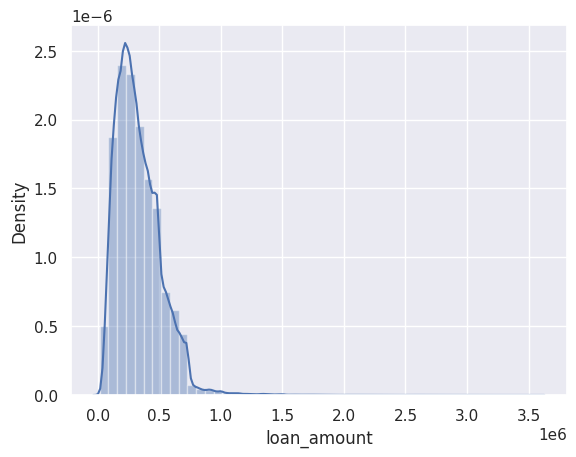

In [ ]:
sns.distplot(df.loan_amount)

<Axes: xlabel='Status', ylabel='loan_amount'>

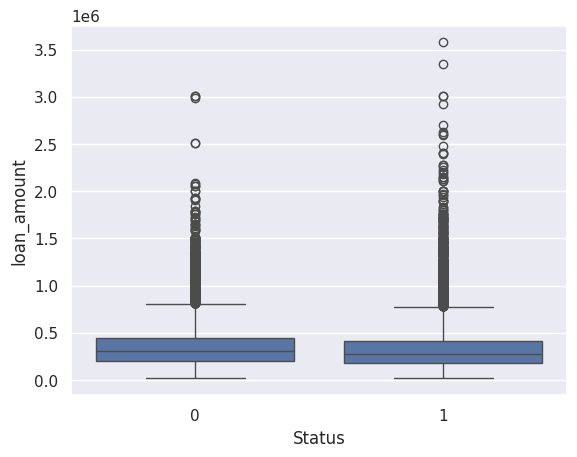

In [ ]:
sns.boxplot(x="Status",y="loan_amount",data=df)

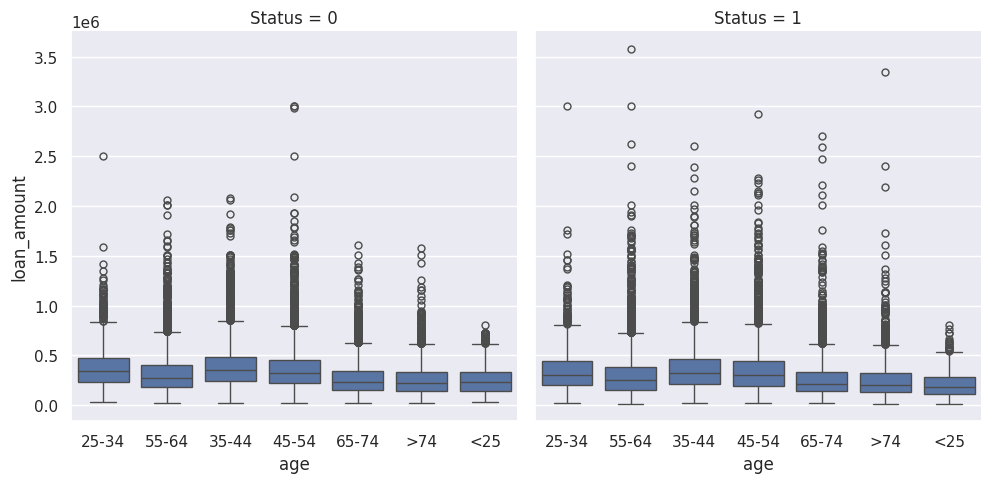

In [ ]:
sns.catplot(data=df,x="age",y="loan_amount",kind="box",col="Status")

In [ ]:
#Getting Dataframes by datatypes

dtypes=pd.DataFrame(df.dtypes).reset_index()

cat_vars=[]
num_vars=[]

for i,l in zip(dtypes['index'],dtypes[0]):
  if l == "object":
    cat_vars.append(i)
  else:
    num_vars.append(i)

We'll start with numerical data first. An effective way of filling NaN values for numerical data
is using a KNNImputer from sklearn. We could fill in the null values using the column median
but this will often bias the data, especially when there are many missing values. KNNImputer
uses the columns that have values (at that index) to estimate the null value of a certain entry.


In [ ]:
num_vars

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [ ]:
#droping year
#df= df.drop("year", axis=1)
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


# We will handle the mising values

In [ ]:
df=df.drop("year",axis=1)

In [ ]:
df

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
df.isnull().sum()

,0
ID,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0


In [ ]:
def missing_values(df):
  mis_vals = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum() /len(df)
  mis_val_table = pd.concat([mis_vals,mis_val_percent],axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  mis_val_table_ren_columns = mis_val_table_ren_columns[
  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  print ("Dataframe has " + str(df.shape[1]) + " columns.\n"
  "There are " + str(mis_val_table_ren_columns.shape[0]) +
  " columns that have missing values.")
  return mis_val_table_ren_columns

In [ ]:
#Missing Values Statistics
missing_values(df)

Dataframe has 33 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Upfront_charges,39642,26.7
Interest_rate_spread,36639,24.6
rate_of_interest,36439,24.5
dtir1,24121,16.2
property_value,15098,10.2
LTV,15098,10.2
income,9150,6.2
loan_limit,3344,2.2
approv_in_adv,908,0.6
submission_of_application,200,0.1


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']] = imputer.fit_transform(df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']])

imputer = SimpleImputer(strategy='most_frequent')
df[['age' ,'loan_limit']] = imputer.fit_transform(df[['age' , 'loan_limit']])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
ID,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0


# **Label Encoding**

In [ ]:
cat_vars

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [ ]:
#Label Encoding for object to numerical conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in cat_vars:
  df[feat]= le.fit_transform(df[feat].astype(str))

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 147315 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         147315 non-null  int64  
 1   loan_limit                 147315 non-null  int64  
 2   Gender                     147315 non-null  int64  
 3   approv_in_adv              147315 non-null  int64  
 4   loan_type                  147315 non-null  int64  
 5   loan_purpose               147315 non-null  int64  
 6   Credit_Worthiness          147315 non-null  int64  
 7   open_credit                147315 non-null  int64  
 8   business_or_commercial     147315 non-null  int64  
 9   loan_amount                147315 non-null  int64  
 10  rate_of_interest           147315 non-null  float64
 11  Interest_rate_spread       147315 non-null  float64
 12  Upfront_charges            147315 non-null  float64
 13  term                       147315 

## Scaling the data

In [ ]:
# Scaling data after droping the target variable
from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(df.drop("Status", axis = 1)))

In [ ]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.731475,-0.266356,1.322529,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,-1.169116,...,-0.827930,1.394649,0.502745,-0.997905,-1.473552,0.741861,0.683792,1.091399,0.014969,0.752519
1,-1.731452,-0.266356,0.373707,-0.430908,1.019801,-1.648031,-0.211787,-0.061384,-2.490858,-0.679480,...,-0.313822,0.557693,-1.275172,1.002100,0.499797,0.741861,0.000370,-0.974414,0.014969,0.000108
2,-1.731428,-0.266356,0.373707,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,0.408601,...,0.400217,1.394649,1.158676,-0.997905,-0.815769,0.741861,0.191680,1.091399,0.014969,0.856056
3,-1.731405,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,0.680621,...,0.781037,1.394649,-0.973099,-0.997905,-0.157986,-1.347961,-0.088260,-0.974414,0.014969,0.441908
4,-1.731382,-0.266356,-0.575116,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,1.986318,...,0.552545,-0.279264,-0.843639,1.002100,-1.473552,-1.347961,0.503817,-0.974414,0.014969,0.131297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147310,1.731984,-0.266356,1.322529,-0.430908,-0.519288,0.101783,-0.211787,-0.061384,0.401468,0.571813,...,0.143163,-1.116220,-0.351691,1.002100,0.499797,0.741861,-0.024715,1.091399,0.014969,1.063131
147311,1.732007,-0.266356,0.373707,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,1.387873,...,0.028917,-1.116220,-1.128451,-0.997905,-1.473552,-1.347961,0.044625,1.091399,0.014969,-2.353593
147312,1.732031,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,0.626217,...,-0.009165,-1.116220,0.019428,1.002100,-0.157986,-1.347961,-0.299857,-0.974414,0.014969,1.166668
147313,1.732054,-0.266356,-1.523939,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,-0.733884,...,0.028917,1.394649,0.321501,1.002100,0.499797,0.741861,-0.053894,-0.974414,0.014969,-0.904074


# **Splitting The Data**
Splitting the Data (Original DataFrame) Before proceeding with the Random UnderSampling
technique we have to separate the orginal dataframe.

Why? for testing purposes, remember
although we are splitting the data when implementing Random UnderSampling or
OverSampling techniques, we want to test our models on the original testing set not on the
testing set created by either of these techniques. The main goal is to fit the model either
with the dataframes that were undersample and oversample (in order for our models to
detect the patterns), and test it on the original testing set.

In [ ]:
target = df.Status
X=df.drop("Status",axis=1)

In [ ]:
#Splitting the data into train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,target,test_size=0.25,random_state=42)

## Random Under Sampling


In this phase of the project we will implement "Random Under Sampling" which basically
consists of removing data in order to have a more balanced dataset and thus avoiding our
models to overfitting.

In [ ]:
df.Status.value_counts()

,count
Status,
0,111176
1,36139


In [ ]:
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)
# amount of default classes 36139 rows.
default_df = df.loc[df['Status'] == 1]
non_default_df = df.loc[df['Status'] == 0][:36139]
normal_distributed_df = pd.concat([default_df, non_default_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df


,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
85358,110248,0,3,0,2,3,0,0,1,146500,...,3,671,0,2,1,92.721519,3,1,0,37.732932
117745,142635,0,3,0,0,0,0,0,1,266500,...,0,613,1,6,1,81.250000,3,1,1,53.000000
283,25173,0,1,0,0,3,0,0,1,436500,...,0,605,1,1,0,69.506369,3,1,0,49.000000
12035,36925,0,3,0,0,3,1,0,1,696500,...,2,707,1,1,0,72.746457,0,1,1,37.732932
24652,49542,1,1,0,0,3,0,0,1,766500,...,1,615,1,1,0,89.335664,3,1,1,37.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,39675,0,1,0,0,2,0,0,1,486500,...,0,875,1,2,1,51.318565,2,1,0,39.000000
136198,161088,0,3,0,1,3,1,0,0,226500,...,2,829,1,3,1,72.746457,3,1,1,37.732932
100319,125209,0,3,0,0,0,0,0,1,726500,...,1,636,1,2,0,88.814181,3,1,0,48.000000
103159,128049,1,1,0,1,2,0,0,0,576500,...,1,545,1,2,0,83.793605,0,1,1,41.000000


The distribution of the classes of the subsample dataset
Status
0    0.5
1    0.5
Name: count, dtype: float64


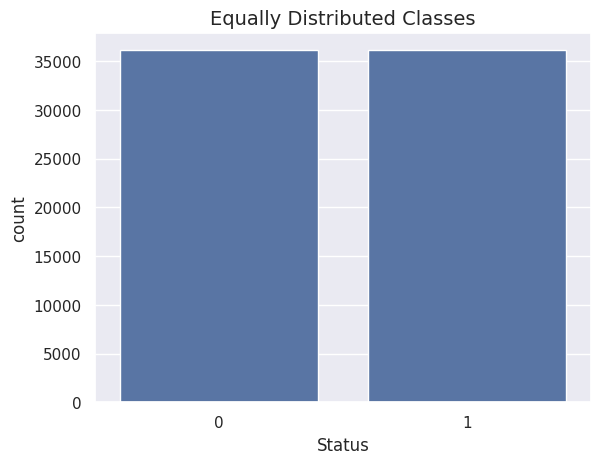

In [ ]:
print("The distribution of the classes of the subsample dataset")
print(new_df.Status.value_counts()/len(new_df))

sns.countplot(data=new_df,x="Status")
plt.title("Equally Distributed Classes",fontsize=14)
plt.show()

## **Model Building**

In [ ]:
#New X_train,y_train
X_train=new_df.drop("Status",axis=1)
y_train=new_df.Status


## **KNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure x_train and x_test are NumPy arrays or Pandas DataFrames
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)

# Optionally, check for NaN or infinite values
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
 print("NaN values found in x_train or y_train")
if np.any(np.isinf(X_train)) or np.any(np.isinf(y_train)):
 print("Infinite values found in x_train or y_train")

#For checking if the datatypes are compatible
print(X_train.dtype,y_train.dtype)

float64 int64


In [ ]:
#Initialize and Train the model

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

#Make predictions
y_pred = knn.predict(X_test)


In [ ]:
# Accuracy Scores
Accuracy_score =accuracy_score(y_test,y_pred)
print(f"Accuracy score of KNN model:{Accuracy_score}")
print(knn.score(X_train,y_train))

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score of KNN model:0.7551386135925493
0.791776197459808
[[27811     0]
 [ 9018     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.76     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.76      0.65     36829



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5


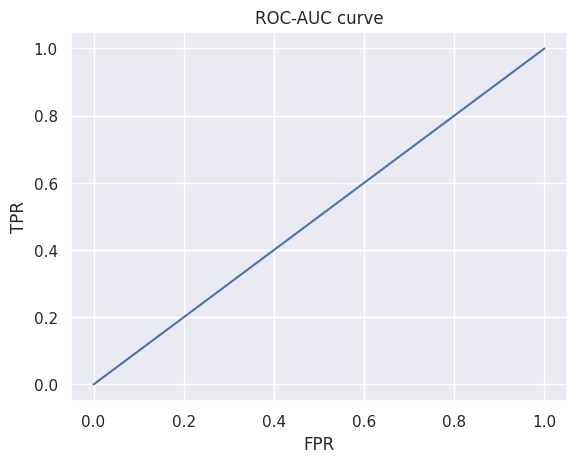

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_probability = knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_probability)
print(roc_auc_score(y_test,y_pred_probability))
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC curve")
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Make predictions
y_pred = lr.predict(X_test)

# Scoring Calculations
acc_sc=accuracy_score(y_test,y_pred)
print(f"Accuracy for logistic:{acc_sc}")

Accuracy for logistic:0.5545358277444405


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.51      0.63     27811
           1       0.32      0.70      0.44      9018

    accuracy                           0.55     36829
   macro avg       0.58      0.60      0.53     36829
weighted avg       0.71      0.55      0.58     36829

[[14078 13733]
 [ 2673  6345]]


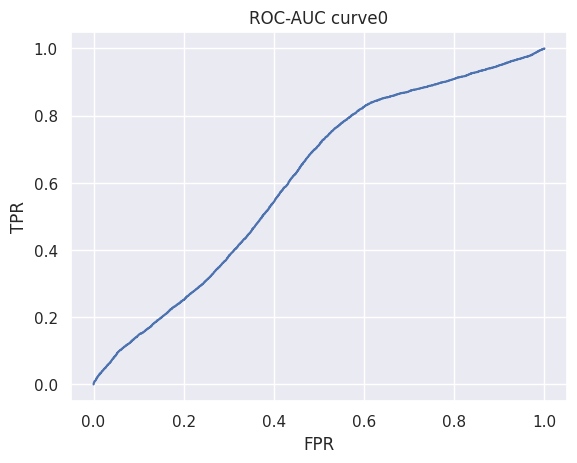

In [ ]:
## ROC-AUC curve and score

y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC curve0")
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Accuracy: 0.7551386135925493
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.76     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.76      0.65     36829



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


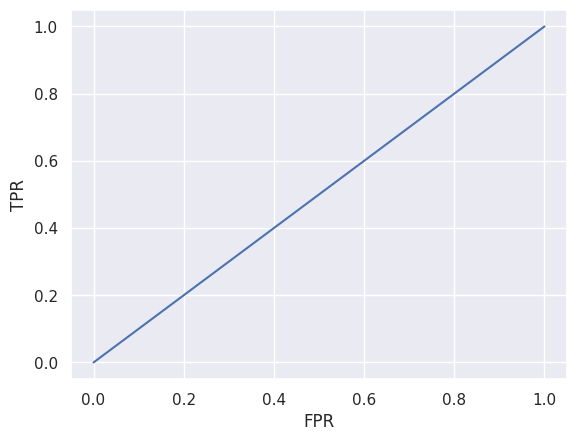

roc-auc score:0.5


In [ ]:
y_pred_proba=tree.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print(f"roc-auc score:{roc_auc_score(y_test,y_pred_proba)}")

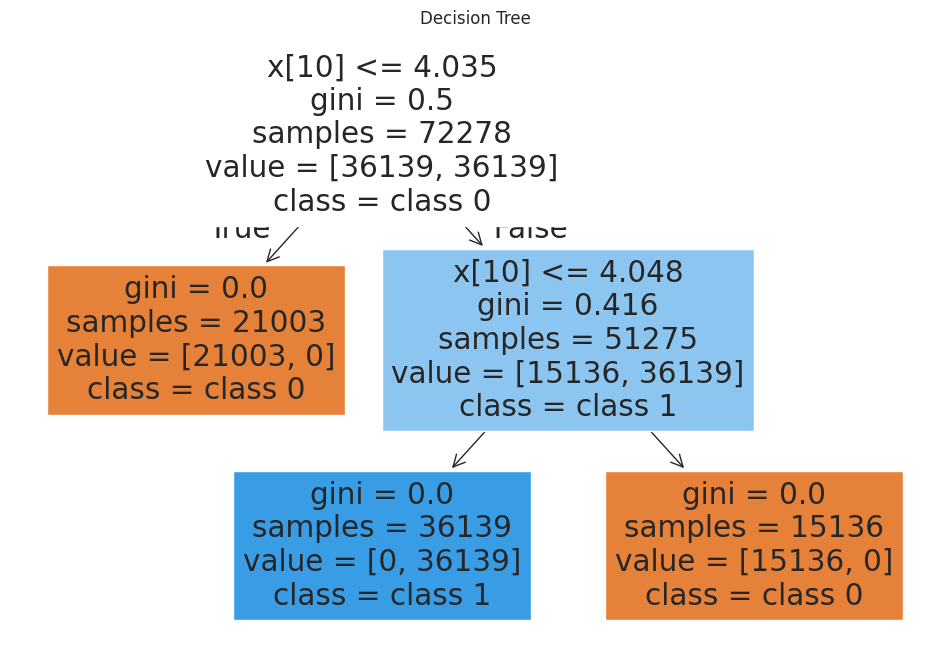

In [ ]:
#Visualising the Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree,filled=True,class_names=["class 0","class 1"])
plt.title("Decision Tree")
plt.show()

## Bagging


0.7551386135925493


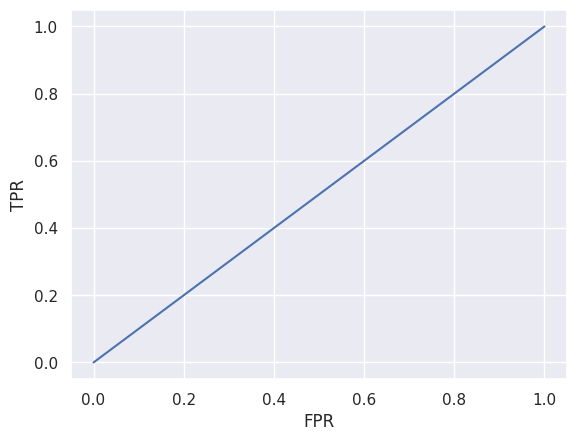

In [ ]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=16)
bc=BaggingClassifier(estimator=dt,n_estimators=300,n_jobs=-1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import roc_curve
y_pred_proba=bc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

[[27811     0]
 [ 9018     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.76     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.76      0.65     36829

0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,n_jobs=-1,min_samples_leaf=0.01)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7541882755437291


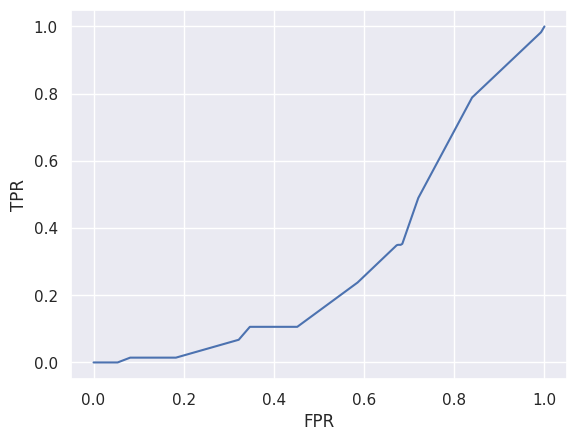

ROC-AUC score is0.30755170309324026
[[27776    35]
 [ 9018     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print(f"ROC-AUC score is{roc_auc_score(y_test,y_pred_proba)}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



## **Adaboost Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(estimator=dt,n_estimators=1)
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(ad.score(X_train,y_train))

0.7551386135925493
1.0


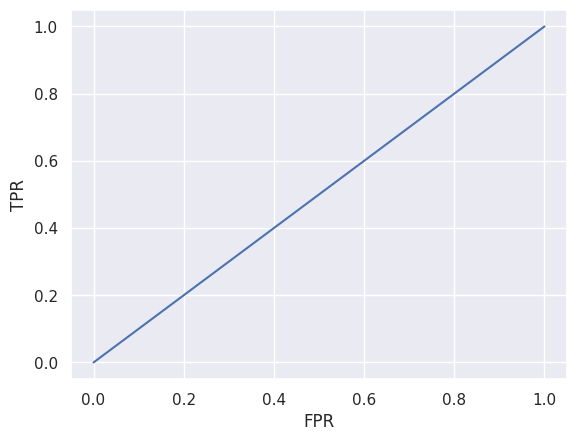

ROC-AUC score is 0.5
[[27811     0]
 [ 9018     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.76     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.76      0.65     36829



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba=ad.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
print(f"ROC-AUC score is {roc_auc_score(y_test,y_pred_proba)}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=17,max_depth=12)
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.7551386135925493


In [ ]:
print(gbc.score(X_train,y_train))


1.0


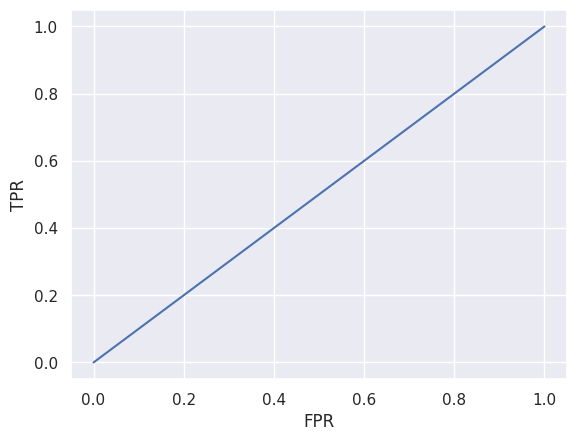

In [ ]:
y_pred_proba=gbc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()



In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))


0.5


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[27811     0]
 [ 9018     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.76     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.76      0.65     36829



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## XGBoosting

In [ ]:
# Install XGBoost if not already installed
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Initialize the XGBoost classifier with similar parameters
xgbc = XGBClassifier(n_estimators=17, max_depth=12)

# Fit the model to the training data
xgbc.fit(X_train, y_train)
# Make predictions on the test data
y_pred = xgbc.predict(X_test)
# Calculate and print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.7551386135925493


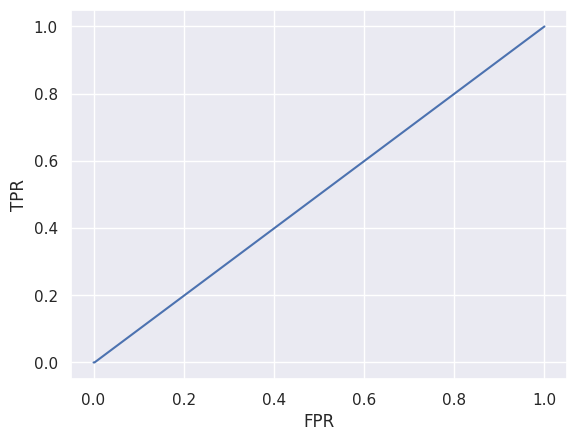

In [ ]:
y_pred_proba=xgbc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
print(roc_auc_score(y_test,y_pred_proba))

0.4989033116392794


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27811     0]
 [ 9018     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     27811
           1       0.00      0.00      0.00      9018

    accuracy                           0.76     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.76      0.65     36829



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
